In [1]:
# This program generates Fig. 6C 
# It generates the supplementary figures with power spectrum of the 'optogenetic experiments' in layer 4 only
# Model where only layer 4 is present then
# We switch off a particular group and observe the effetc on the oscillations 

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [3]:
#Importing some info I need for this program
runtime=np.loadtxt("../general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("../general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")

The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [5]:
a='../simulations_data/Cont/Spikes_files_pv_all' #Folder where the spikes files are contained

In [6]:
#Upload the spikes files
#layer1
S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000

#layer23
S_e23i=np.array(np.loadtxt(a+'/S_e23i.txt') )
S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000

S_pv23i=np.array(np.loadtxt(a+'/S_pv23i.txt') )
S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000

S_sst23i=np.array(np.loadtxt(a+'/S_sst23i.txt') )
S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000

S_vip23i=np.array(np.loadtxt(a+'/S_vip23i.txt') )
S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#layer4
S_e4i=np.array(np.loadtxt(a+'/S_e4i.txt') )
S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000

S_pv4i=np.array(np.loadtxt(a+'/S_pv4i.txt') )
S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000

S_sst4i=np.array(np.loadtxt(a+'/S_sst4i.txt') )
S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000

S_vip4i=np.array(np.loadtxt(a+'/S_vip4i.txt') )
S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#layer5
S_e5i=np.array(np.loadtxt(a+'/S_e5i.txt') )
S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000

S_pv5i=np.array(np.loadtxt(a+'/S_pv5i.txt') )
S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000

S_sst5i=np.array(np.loadtxt(a+'/S_sst5i.txt') )
S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000

S_vip5i=np.array(np.loadtxt(a+'/S_vip5i.txt') )
S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#layer6
S_e6i=np.array(np.loadtxt(a+'/S_e6i.txt') )
S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000

S_pv6i=np.array(np.loadtxt(a+'/S_pv6i.txt') )
S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000

S_sst6i=np.array(np.loadtxt(a+'/S_sst6i.txt') )
S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000

S_vip6i=np.array(np.loadtxt(a+'/S_vip6i.txt') )
S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000

/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11448/1509631370.py:3: UserWarning: loadtxt: input contained no data: "../simulations_data/Cont/Spikes_files_pv_all/S_vip1i.txt"
  S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11448/1509631370.py:4: UserWarning: loadtxt: input contained no data: "../simulations_data/Cont/Spikes_files_pv_all/S_vip1t.txt"
  S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000


In [7]:
#Function for computation of the firing rates from spikes
def rates(data,iniz,fin,window,step_size):
    spikes=0
    time=iniz*1000 #Initial time you want to start computing the rates from (of the total lenght of the simulation time)
    all_time=fin*1000 #Final time you want to finish to compute the rates
    rates=[]
    sort_data=np.sort(data)

    while time <= all_time-window:
        for i in range(0,len(data)):
                if time <sort_data[i]< time+window:
                    spikes+=1
                elif sort_data[i]>= time+window:
                    break
        rates.append(spikes/window)
        time+=step_size
        spikes=0
    return rates  

In [8]:
#CALL THE FUNCTION of rates for one population as example
# iniz=55 #Starting time 
# fin=56 #Final time 
# window=200 #Sliding window
# step=1 #step of the sliiding window
# rates_e4=rates(S_e4t,iniz,fin,window,step)
# #Create one plot of the firing rates of the desired layer
# fig = plt.figure(figsize=(6,4))
# plt.plot(rates_e4,color='red', label='E4')
# plt.xlabel('time (ms)')
# plt.ylabel('spikes/s')
# plt.legend()
# plt.title('Pops activity - layer 4')
# plt.show()

In [9]:
#Function to compute the power spectrum
def power_spectrum(LFP,sec):
    data = LFP
    #print(len(data))
    #le ampiezze non sono relative alle freq in hertz ma al numero di oscillazionin complete nel mio intervallo
    #il primo numero dell'array e' l'ampiezza della frequenza che ci sta una volta (onda che fa 1 giro nell'intervallo), 
    #il secondo numero e' l'ampiezza della frequenza che ci sta due volte (l'onda fa il giro completo 2 volte)
    fourier_transform = np.fft.rfft(data)
    abs_fourier_transform = np.abs(fourier_transform)
    power_spectrum = np.square(abs_fourier_transform)
    #print(fourier_transform[0:100])
    #print(len(fourier_transform)) #Circa meta' della lunghezza della mia time series da analizzare
    #print(power_spectrum)
    # x divided by the time in s of my simulation to obtain Hz (sec is given to the function)
    frequency=[x/sec for x in range(0,len(power_spectrum))]

    return frequency, power_spectrum

In [16]:
# #To compute the rates of neurons in layer 4 (only layer 4 is present in this model)
# #I already computed it and saved in folder so there is no need to run this, but this is how it was cmoputed and then saved
# r_e4_all_s=[]
# r_pv4_all_s=[]
# r_sst4_all_s=[]
# r_vip4_all_s=[]

# # #I upload all the simualtions from the folders (Optogenetic experiments on layer 4)
# for i in ['','pv','pv_input','pv_sst','pv_sst_vip','pvSUB','pv_vip','sst','vip','vip_sst']:

#     a='../simulations_data/l4/Spikes_files_l4_'+i

#     #layer4
#     S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000
#     S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000
#     S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000
#     S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#     #SELECT THE PART I WANT
#     iniz=55
#     fin=56
#     window=1
#     step=1


#     r_e4=rates(S_e4t,iniz,fin,window,step)
#     r_pv4=rates(S_pv4t,iniz,fin,window,step)
#     r_sst4=rates(S_sst4t,iniz,fin,window,step)
#     r_vip4=rates(S_vip4t,iniz,fin,window,step)

    
#     r_e4_all_s.append(r_e4)
#     r_pv4_all_s.append(r_pv4)
#     r_sst4_all_s.append(r_sst4)
#     r_vip4_all_s.append(r_vip4)

In [17]:
# #I save the rates in a folder
# save_folder='rate4_1_1'
# np.save('../simulations_data/RATE_FILE_SAVED/Switch_off_l4/'+save_folder+'/r_e4_all', r_e4_all_s)
# np.save('../simulations_data/RATE_FILE_SAVED/Switch_off_l4/'+save_folder+'/r_pv4_all', r_pv4_all_s)
# np.save('../simulations_data/RATE_FILE_SAVED/Switch_off_l4/'+save_folder+'/r_sst4_all', r_sst4_all_s)
# np.save('../simulations_data/RATE_FILE_SAVED/Switch_off_l4/'+save_folder+'/r_vip4_all', r_vip4_all_s)

In [18]:
#TO UPLOAD THE COMPUTED RATES

In [10]:
#Folder containing the info I need 
saved_folder='Switch_off_l4_OLD/rate4_1_1'
#I UPLOAD THE SAVED FOLDERS
r_e4_all=np.load('../simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e4_all.npy')
r_pv4_all=np.load('../simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_pv4_all.npy')
r_sst4_all=np.load('../simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_sst4_all.npy')
r_vip4_all=np.load('../simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_vip4_all.npy')

In [11]:
#Plot the RATES FOR THE DIFFERENT OPTO CONDITIONS ANALYZED 
#(This is not needed to computer later the power spectrum, which is what we are interested in)

In [12]:
# #Create the figure with the values for the different simulations
# f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,9))

# #E4 for the different opto conditions
# ax1.plot(r_e4_all[0], label='e4_control')
# ax1.plot(r_e4_all[1], label='e4_pv')
# # ax1.plot(r_e4_all[2], label='e4_pv_input')
# # ax1.plot(r_e4_all[3], label='e4_pv_sst')
# # ax1.plot(r_e4_all[4], label='e4_pv_sst_vip')
# # ax1.plot(r_e4_all[5], label='e4_pvSUB')
# # ax1.plot(r_e4_all[6], label='e4_pv_vip')
# ax1.plot(r_e4_all[7], label='e4_sst')
# ax1.plot(r_e4_all[8], label='e4_vip')
# # ax1.plot(r_e4_all[9], label='e4_vip_sst')

# ax1.legend()
# ax1.set_xlabel('time (ms)')
# ax1.set_ylabel('spikes/s')
# ax1.set_title('Population rates - layer 2/3')

# #PV4 for the different opto conditions
# ax2.plot(r_pv4_all[0], label='pv4_control')
# ax2.plot(r_pv4_all[1], label='pv4_pv')
# # ax2.plot(r_pv4_all[2], label='pv4_pv_input')
# ax2.plot(r_pv4_all[3], label='pv4_pv_sst')
# ax2.plot(r_pv4_all[4], label='pv4_pv_sst_vip')
# ax2.plot(r_pv4_all[5], label='pv4_pvSUB')
# ax2.plot(r_pv4_all[6], label='pv4_pv_vip')
# ax2.plot(r_pv4_all[7], label='p4_sst')
# ax2.plot(r_pv4_all[8], label='pv4_vip')
# ax2.plot(r_pv4_all[9], label='pv4_vip_sst')

# ax2.legend()
# ax2.set_xlabel('time (ms)')
# ax2.set_ylabel('spikes/s')
# ax2.set_title('Population rates - layer 4')


# #SST4 for the different opto conditions
# ax3.plot(r_sst4_all[0], label='sst4_control')
# ax3.plot(r_sst4_all[1], label='sst4_pv')
# # ax3.plot(r_sst4_all[2], label='sst4_pv_input')
# ax3.plot(r_sst4_all[3], label='sst4_pv_sst')
# ax3.plot(r_sst4_all[4], label='sst4_pv_sst_vip')
# ax3.plot(r_sst4_all[5], label='sst4_pvSUB')
# ax3.plot(r_sst4_all[6], label='sst4_pv_vip')
# ax3.plot(r_sst4_all[7], label='sst4_sst')
# ax3.plot(r_sst4_all[8], label='sst4_vip')
# ax3.plot(r_sst4_all[9], label='sst4_vip_sst')

# ax3.legend()
# ax3.set_xlabel('time (ms)')
# ax3.set_ylabel('spikes/s')
# ax3.set_title('Population rates - layer 5')

# #VIP4 for the different opto conditions
# ax4.plot(r_vip4_all[0], label='vip4_control')
# ax4.plot(r_vip4_all[1], label='vip4_pv')
# # ax4.plot(r_vip4_all[2], label='vip4_pv_input')
# ax4.plot(r_vip4_all[3], label='vip4_pv_sst')
# ax4.plot(r_vip4_all[4], label='vip4_pv_sst_vip')
# ax4.plot(r_vip4_all[5], label='vip4_pvSUB')
# ax4.plot(r_vip4_all[6], label='vip4_pv_vip')
# ax4.plot(r_vip4_all[7], label='vip4_sst')
# ax4.plot(r_vip4_all[8], label='vip4_vip')
# ax4.plot(r_vip4_all[9], label='vip4_vip_sst')

# ax4.legend()
# ax4.set_xlabel('time (ms)')
# ax4.set_ylabel('spikes/s')
# ax4.set_title('Population rates - layer 6')

In [13]:
#Compute the power spectrum for all the simulations 
sec=1 #seconds I am analysing
freq0,power_sp0=power_spectrum(r_e4_all[0],sec)
freq1,power_sp1=power_spectrum(r_e4_all[1],sec)
freq2,power_sp2=power_spectrum(r_e4_all[2],sec)
freq3,power_sp3=power_spectrum(r_e4_all[3],sec)
freq4,power_sp4=power_spectrum(r_e4_all[4],sec)
freq5,power_sp5=power_spectrum(r_e4_all[5],sec)
freq6,power_sp6=power_spectrum(r_e4_all[6],sec)
freq7,power_sp7=power_spectrum(r_e4_all[7],sec)
freq8,power_sp8=power_spectrum(r_e4_all[8],sec)
freq9,power_sp9=power_spectrum(r_e4_all[9],sec)

In [14]:
#Power spectrum of the different optogenetic experiments analyzed

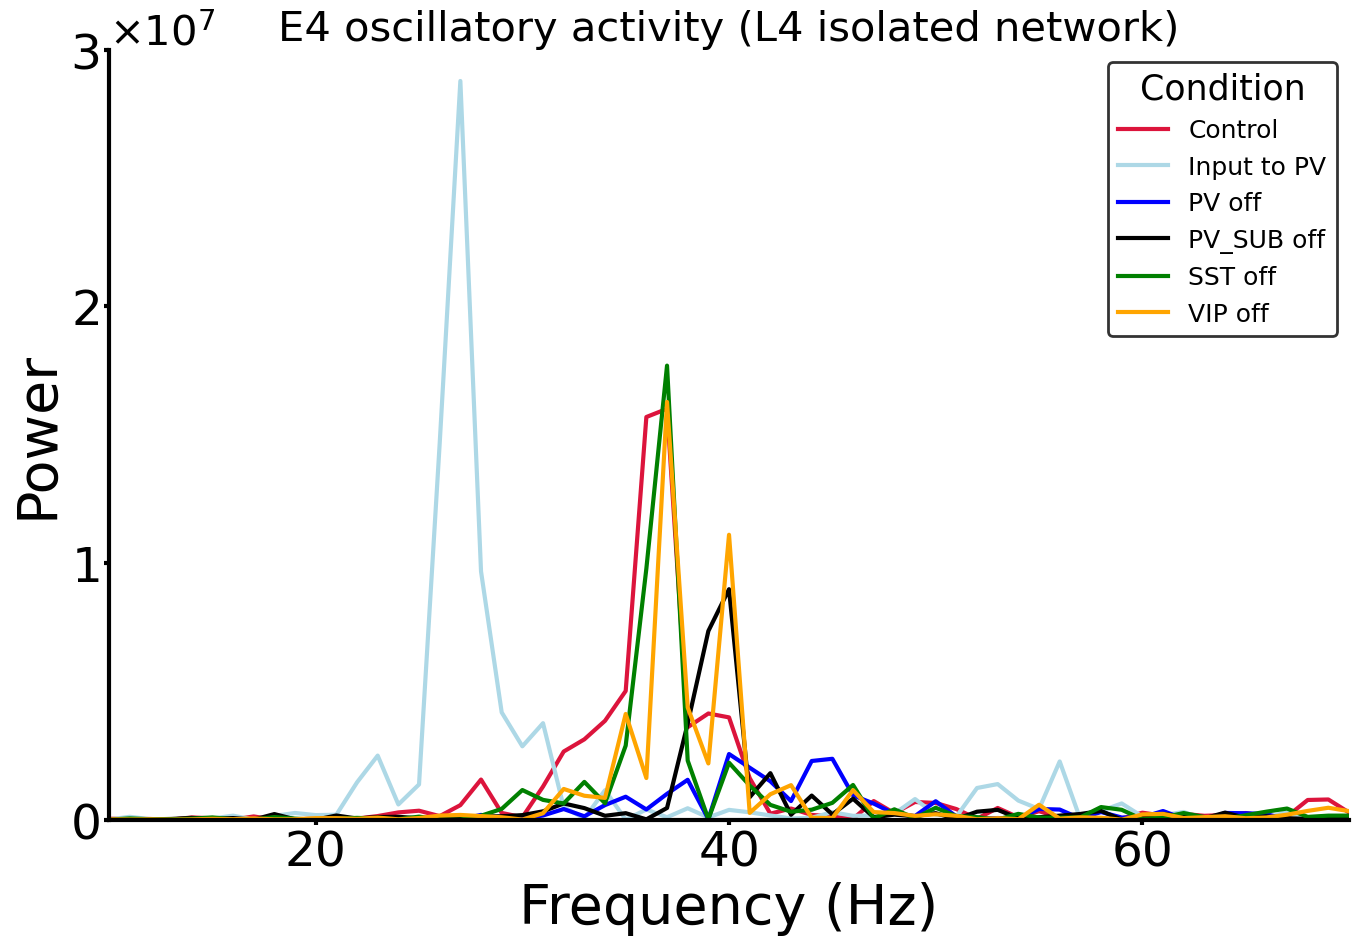

In [15]:
#Create figure 
fig3,ax = plt.subplots(figsize=(16,10))
#Plot curves, I plot only some of them (if you want uncomment the others to see them all)
plt.plot(freq0[1:], power_sp0[1:],linewidth=3,color='crimson',label='Control')
plt.plot(freq2[1:], power_sp2[1:],linewidth=3,color='lightblue',label='Input to PV')
plt.plot(freq1[1:], power_sp1[1:],linewidth=3,color='blue',label='PV off')
#plt.plot(freq3[1:], power_sp3[1:],linewidth=3,label='pv+sst')
plt.plot(freq5[1:], power_sp5[1:],linewidth=3,color='k',label='PV_SUB off')
#plt.plot(freq6[1:], power_sp6[1:],linewidth=3,label='pv+vip')
plt.plot(freq7[1:], power_sp7[1:],linewidth=3,color='green',label='SST off')
plt.plot(freq8[1:], power_sp8[1:],linewidth=3,color='orange',label='VIP off')
#plt.plot(freq4[1:], power_sp4[1:],linewidth=3,color='pink',label='All inhib. off')
#plt.plot(freq9[1:], power_sp9[1:],linewidth=3,label='vip+sst')

#legend 
l1=plt.legend(loc='best',title="Condition", fontsize=18, title_fontsize=25)
l1.get_frame().set_linewidth(2.0)
l1.get_frame().set_edgecolor('k')


#Layout and labels, ticks size
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)
ax.tick_params(axis="x", labelsize=35)
ax.tick_params(axis="y", labelsize=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)

plt.title('E4 oscillatory activity (L4 isolated network)',fontsize=30)
plt.xlabel('Frequency (Hz)',fontsize=40)
plt.ylabel('Power',fontsize=40)
plt.xlim(10,70)
plt.ylim(0,3*10**7)
# y axes style 
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useOffset=None, useLocale=None, useMathText=True)
offset_text = ax.yaxis.get_offset_text()
offset_text.set_size(30)  # Adjust the font size as desired

plt.savefig('../IMAGES/Fig_SUPP_L4_powerSpectrum.png')
plt.show()

In [16]:
#I want to look at the drop in power for the different condition
#For the frequency that in the control condition had the max power. 

#Index with max max power
max_index_col = np.argmax(power_sp0[1:], axis=0)
print(max_index_col)
#frequency forrespondant to the index with max power
print(freq0[max_index_col+1])
#I compute the power value for that frequency for all the different conditions
p0=power_sp0[max_index_col+1]
p1=power_sp1[max_index_col+1]
p2=power_sp2[max_index_col+1]
p3=power_sp3[max_index_col+1]
p4=power_sp4[max_index_col+1]
p5=power_sp5[max_index_col+1]
p6=power_sp6[max_index_col+1]
p7=power_sp7[max_index_col+1]
p8=power_sp8[max_index_col+1]
p9=power_sp9[max_index_col+1]
powers=[p0,p1,p2,p3,p4,p5,p6,p7,p8,p9]
print(p0,p1,p2,p3,p4,p5,p6,p7,p8,p9)

36
37.0
16008979.707635727 1008375.327262347 95829.99616186925 1279065.222339342 101473.8259588084 457800.4578924544 785880.8418908069 17691751.173119552 16277016.625293259 14952273.169760091


In [17]:
# #Create figure with all the condition
# fig4 = plt.figure(figsize=(15,7))
# bars = ('control',
# 'pv',
# 'pv_input',
# 'pv_sst',
# 'pv_sst_vip',
# 'pvSUB',
# 'pv_vip',
# 'sst',
# 'vip',
# 'vip_sst')
# #Layout
# plt.gca().spines['right'].set_color('none')
# plt.gca().spines['top'].set_color('none')
# # Create bars
# x_pos = np.arange(len(bars))
# plt.bar(x_pos,powers)
# # Size tickes and labels 
# plt.xticks(x_pos, bars,size=15)
# plt.xticks(size=15)
# plt.xlabel('Condition',size=20)
# plt.ylabel('Power',size=20)
# plt.title('Power at 37Hz',size=15)

# # Show fig
# plt.show()

In [18]:
#I want to plot only the most relevant ones
#ONLY SOME OF THEM
#['','pv','pv_input','pv_sst','pv_sst_vip','pvSUB','pv_vip','sst','vip','vip_sst']
#0,1,2,3,4,5,6,7,8,9

In [19]:
#Fig. 6C first panel
#The oscillation frequency in the control situation was 37 Hz. 
#Oscillatory power at the 37 Hz frequency for inactivations of different cell groups: all inhibitory,
#PV, PVsub (same number of PV cells silenced as the number of SST cells present in the column), VIP and SST cells.

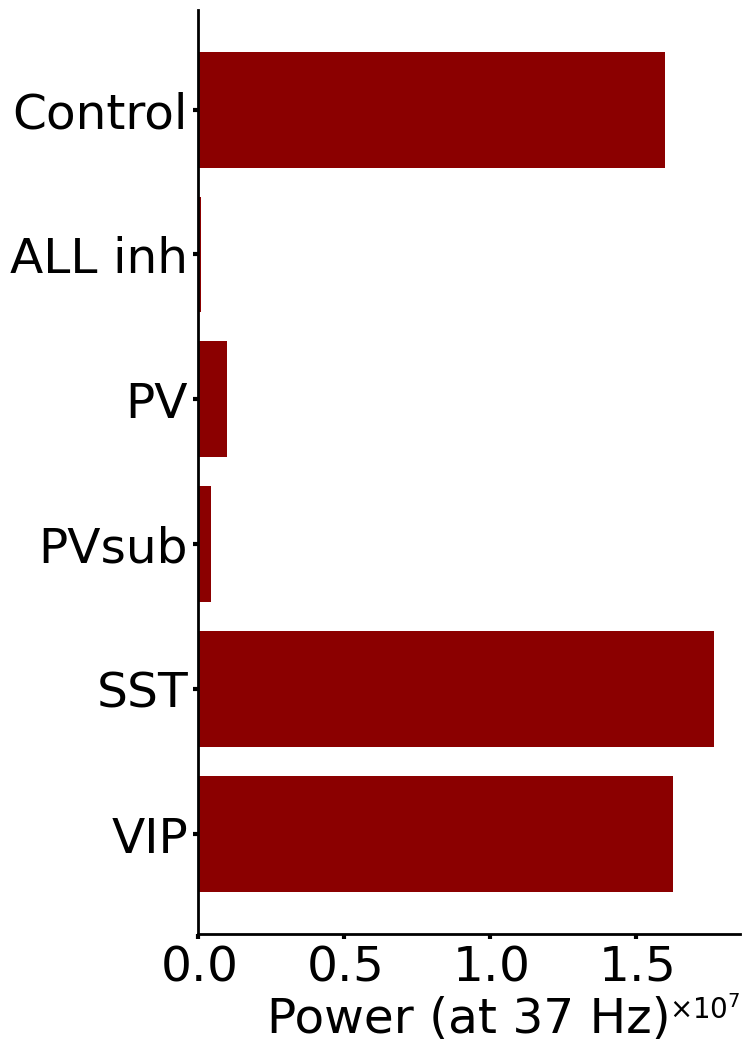

In [20]:
#Create figure
fig4 , ax = plt.subplots(figsize=(7,12))

#labels I want
bars = ('Control',
'ALL inh',
'PV',
'PVsub',
'SST',
'VIP')

def Reverse(tuples):
    new_tup = tuples[::-1]
    return new_tup     
bars=Reverse(bars)
#Values to plot
powers_sel=[p8,p7,p5,p1,p4,p0]

x_pos = np.arange(len(bars))

# Create bars
plt.barh(x_pos,powers_sel,color='darkred', alpha=1)

#create y lables
plt.yticks(x_pos, bars,size=15)
#plt.ylabel('Switch off',size=35)

#Layout, size ticks
plt.setp(ax.spines.values(), linewidth=2)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

plt.xlabel('Power (at 37 Hz)',size=35)
plt.xticks(size=35)
plt.yticks(size=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
plt.locator_params(axis='x', nbins=4)

ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0), useOffset=None, useLocale=None, useMathText=True)
offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(20)  # Adjust the font size as desired

#Save and show fig
plt.savefig('../IMAGES/Fig6C_power_at37.png',bbox_inches='tight')
plt.show()

In [21]:
#FIND freq where the power is maximum 
def find_freq(power_sp0,freq0):
    max_index = np.argmax(power_sp0[1:], axis=0)
    #print(max_index)
    print(freq0[max_index+1])
    return freq0[max_index+1]

f0=find_freq(power_sp0,freq0)
f1=find_freq(power_sp1,freq1)
f2=find_freq(power_sp2,freq2)
f3=find_freq(power_sp3,freq3)
f4=find_freq(power_sp4,freq4)
f5=find_freq(power_sp5,freq5)
f6=find_freq(power_sp6,freq6)
f7=find_freq(power_sp7,freq7)
f8=find_freq(power_sp8,freq8)
f9=find_freq(power_sp9,freq9)

f=[f0,f1,f2,f3,f4,f5,f6,f7,f8,f9]

37.0
40.0
27.0
43.0
41.0
40.0
41.0
37.0
37.0
37.0


In [22]:
# #SECOND PEAK!
# #to find the seconf peak
# def find_freq_from(power_sp0,freq0,from_where):
#     max_index = np.argmax(power_sp0[from_where:], axis=0)
#     #print(max_index)
#     print(freq0[max_index+from_where])
#     return freq0[max_index+from_where]

# f0=find_freq_from(power_sp0,freq0,37)
# f1=find_freq_from(power_sp1,freq1,41)
# f2=find_freq_from(power_sp2,freq2,3)
# f3=find_freq_from(power_sp3,freq3,37)
# f4=find_freq_from(power_sp4,freq4,43)
# f5=find_freq_from(power_sp5,freq5,37)
# f6=find_freq_from(power_sp6,freq6,37)
# f7=find_freq_from(power_sp7,freq7,37)
# f8=find_freq_from(power_sp8,freq8,37)
# f9=find_freq_from(power_sp9,freq9,37)

# f=[f0,f1,f2,f3,f4,f5,f6,f7,f8,f9]

In [23]:
# #Create figure with all the condition
# fig4 = plt.figure(figsize=(15,7))
# #labels of bars
# bars = ('control',
# 'pv',
# 'pv_input',
# 'pv_sst',
# 'pv_sst_vip',
# 'pvSUB',
# 'pv_vip',
# 'sst',
# 'vip',
# 'vip_sst')
# # Create bar
# x_pos = np.arange(len(bars))
# plt.bar(x_pos,f)
# # Layout
# plt.gca().spines['right'].set_color('none')
# plt.gca().spines['top'].set_color('none')
# # Create names on the x-axis
# plt.xticks(x_pos, bars,size=15)
# plt.xticks(size=15)
# plt.xlabel('Condition',size=20)
# plt.ylabel('freq with max power',size=20)
# plt.title('freq with max power',size=15)

# # Show fig
# plt.show()

In [24]:
#Fig. 6C second panel
#Oscillatory frequency with the maximum power for the conditions analyzed:
#all inhibitory, PV, PVsub, VIP and SST cells. 

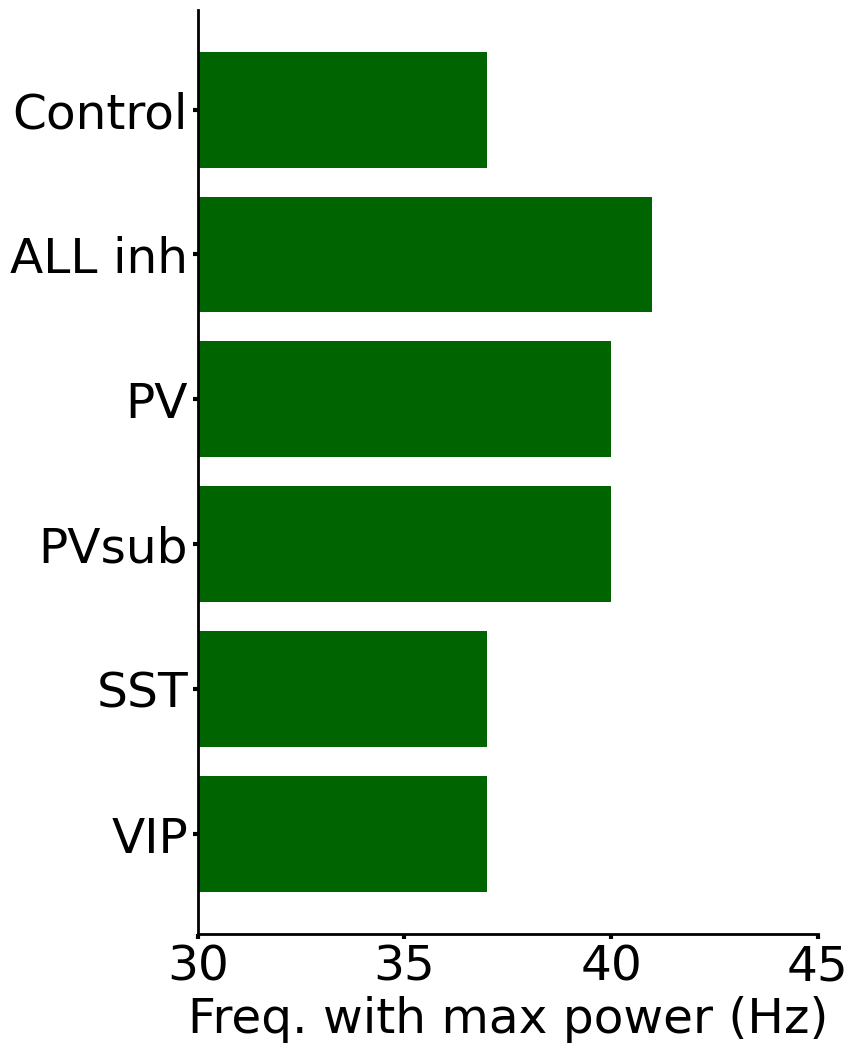

In [25]:
fig4, ax = plt.subplots(figsize=(8,12))
bars = ('Control',
'ALL inh',
'PV',
'PVsub',
'SST',
'VIP')

bars=Reverse(bars)
f_sel=[f8,f7,f5,f1,f4,f0]


x_pos = np.arange(len(bars))
# Create bars
plt.barh(x_pos,f_sel,color='darkgreen')


#create y lables
plt.yticks(x_pos, bars,size=15)

#Layout, size ticks
plt.setp(ax.spines.values(), linewidth=2)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xticks(size=35)
plt.yticks(size=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
plt.locator_params(axis='x', nbins=4)
#plt.ylabel('Switch off',size=35)
plt.xlabel('Freq. with max power (Hz)',size=35)
plt.xlim(30,45)

#Save and show graphic
plt.savefig('../IMAGES/Fig6C_freq_maxPW.png',bbox_inches='tight')
plt.show()